In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [111]:
def plot_wave(D, omega_D, gamma):
    L = 1.0  # length of the pendulum in meters
    g = 9.8  # acceleration due to gravity in m/s^2

    # Define the system of differential equations
    def pendulum_system(t, state):
        x, y, z = state
        dxdt = y
        dydt = D * np.cos(z) - (g/L) * np.sin(x) - gamma * y
        dzdt = omega_D
        return [dxdt, dydt, dzdt]

    # Initial conditions for the two sets
    initial_conditions_1 = [0, 1, 0]
    initial_conditions_2 = [0, 1 + 1e-6, 0]


    # Time span for the simulation
    t_span = (0, 50)
    t_eval = np.linspace(0, 50, 10000)  # Generate time points for evaluation

    # Solve the system numerically using solve_ivp
    sol1 = solve_ivp(pendulum_system, t_span, initial_conditions_1, t_eval=t_eval, method='RK45')
    sol2 = solve_ivp(pendulum_system, t_span, initial_conditions_2, t_eval=t_eval, method='RK45')

    # Plotting y = dθ/dt as a function of t for both initial conditions
    plt.figure(figsize=(12, 6))
    plt.plot(sol1.t, sol1.y[1], label='y(t) for initial conditions: x(0)=0, y(0)=1, z(0)=0', alpha = 0.8, color = 'k')
    plt.plot(sol2.t, sol2.y[1], label='y(t) for initial conditions: x(0)=0, y(0)=1+1e-6, z(0)=0', alpha = 0.8, color = 'b')
    plt.title('Chaotic Behavior of a Pendulum')
    plt.xlabel('Time t (s)')
    plt.ylabel('Angular Velocity ')
    plt.legend()
    plt.grid()
    plt.show()

    (D, omega_D, gamma)


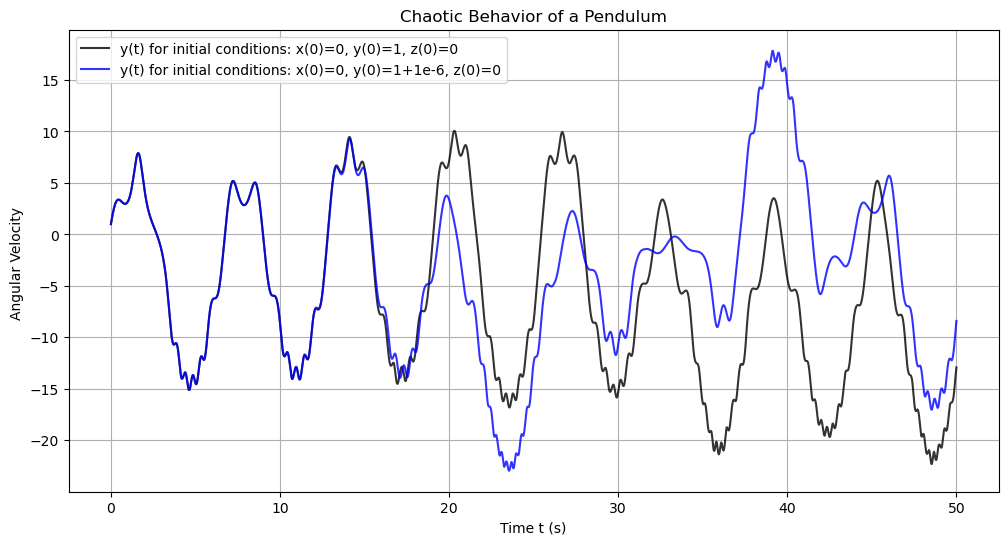

In [112]:
plot_wave(D = 10, omega_D= 1, gamma= 0.01)